In [35]:
import numpy as np
import pandas as pd
# from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
# import sklearn

In [36]:
import os

---

In [37]:
train  = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')

train = train.drop(['index'],axis = 1)
test =test.drop(['index'],axis = 1)

In [38]:
concat_features = train

mask = concat_features.introelapse > (concat_features.introelapse.quantile(0.75) + 1.5 * (concat_features.introelapse.quantile(0.75) - concat_features.introelapse.quantile(0.25)))
concat_features.introelapse[mask] = concat_features.introelapse.quantile(0.75)

mask = concat_features.testelapse > (concat_features.testelapse.quantile(0.75) + 1.5 * (concat_features.testelapse.quantile(0.75) - concat_features.testelapse.quantile(0.25)))
concat_features.testelapse[mask] = concat_features.testelapse.quantile(0.75)

mask = concat_features.surveyelapse > (concat_features.surveyelapse.quantile(0.75) + 1.5 * (concat_features.surveyelapse.quantile(0.75) - concat_features.surveyelapse.quantile(0.25)))
concat_features.surveyelapse[mask] = concat_features.surveyelapse.quantile(0.75)

train = concat_features



concat_features = test

mask = concat_features.introelapse > (concat_features.introelapse.quantile(0.75) + 1.5 * (concat_features.introelapse.quantile(0.75) - concat_features.introelapse.quantile(0.25)))
concat_features.introelapse[mask] = concat_features.introelapse.quantile(0.75)

mask = concat_features.testelapse > (concat_features.testelapse.quantile(0.75) + 1.5 * (concat_features.testelapse.quantile(0.75) - concat_features.testelapse.quantile(0.25)))
concat_features.testelapse[mask] = concat_features.testelapse.quantile(0.75)

mask = concat_features.surveyelapse > (concat_features.surveyelapse.quantile(0.75) + 1.5 * (concat_features.surveyelapse.quantile(0.75) - concat_features.surveyelapse.quantile(0.25)))
concat_features.surveyelapse[mask] = concat_features.surveyelapse.quantile(0.75)

test = concat_features


In [39]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(train[name], prefix = name)
    train = pd.concat([train, mergedata], axis=1)
    train = train.drop([name], axis = 1)

In [40]:
for name in ['education', 'urban', 'gender', 'engnat', 'hand', 'religion',
            'voted', 'married']:

    mergedata = pd.get_dummies(test[name], prefix = name)
    test = pd.concat([test, mergedata], axis=1)
    test = test.drop([name], axis = 1)

In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 94 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Q1             14959 non-null  float64
 1   Q2             14931 non-null  float64
 2   Q3             14950 non-null  float64
 3   Q4             14929 non-null  float64
 4   Q5             14962 non-null  float64
 5   Q6             14952 non-null  float64
 6   Q7             14924 non-null  float64
 7   Q8             14952 non-null  float64
 8   Q9             14944 non-null  float64
 9   Q10            14928 non-null  float64
 10  Q11            14941 non-null  float64
 11  Q12            14933 non-null  float64
 12  Q13            14960 non-null  float64
 13  Q14            14964 non-null  float64
 14  Q15            14955 non-null  float64
 15  Q16            14967 non-null  float64
 16  Q17            14963 non-null  float64
 17  Q18            14937 non-null  float64
 18  Q19   

<AxesSubplot: >

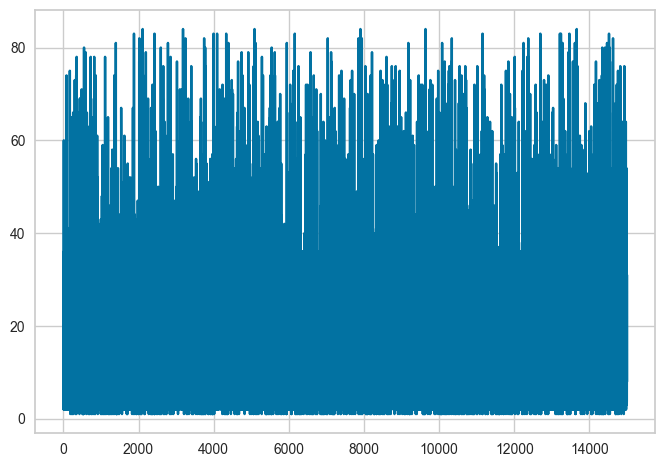

In [42]:
train.introelapse.plot()

In [43]:
train['Ex'] = train['TIPI1']-train['TIPI6']
train['Ag'] = train['TIPI7']-train['TIPI2']
train['Con'] = train['TIPI3']-train['TIPI8']
train['Es'] =train['TIPI9']-train['TIPI4']
train['Op'] =train['TIPI5']-train['TIPI10']

In [44]:
test['Ex'] = test['TIPI1']-test['TIPI6']
test['Ag'] = test['TIPI7']-test['TIPI2']
test['Con'] = test['TIPI3']-test['TIPI8']
test['Es'] =test['TIPI9']-test['TIPI4']
test['Op'] =test['TIPI5']-test['TIPI10']

In [45]:
train = train.drop(['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
                   'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'],axis = 1)

test = test.drop(['TIPI1','TIPI2','TIPI3','TIPI4','TIPI5',
                   'TIPI6','TIPI7','TIPI8','TIPI9','TIPI10'],axis = 1)

In [46]:
from sklearn.preprocessing import LabelEncoder
ex = LabelEncoder()

con5 = train.country.value_counts().keys()[:5]

for i in range(train.count().max()):
    if(train.country.values[i] not in con5):
        train.country.values[i] = "X"

for i in range(test.count().max()):
    if(test.country.values[i] not in con5):
        test.country.values[i] = "X"

train.country = ex.fit_transform(train.country)

test.country = ex.fit_transform(test.country)

---

In [47]:
# pip install pycaret

In [48]:
from pycaret.classification import *

In [49]:
# 'voted' 컬럼이 예측 대상이므로 target 인자에 명시
# 'voted' column is the target variable
clf = setup(data = train, target = 'nerdiness',use_gpu=True,session_id=2023)

,Description,Value
0,session_id,2023
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(15000, 89)"
5,Missing Values,True
6,Numeric Features,38
7,Categorical Features,50
8,Ordinal Features,False
9,High Cardinality Features,False


In [50]:
# best_3 = compare_models(sort = 'AUC', n_select = 3)

In [51]:
Top3 = compare_models(sort = 'AUC', n_select = 2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7723,0.8609,0.8320,0.7764,0.8032,0.5338,0.5358,1.7710
rf,Random Forest Classifier,0.7697,0.8561,0.8393,0.7695,0.8028,0.5273,0.5303,0.8650
catboost,CatBoost Classifier,0.7569,0.8259,0.8216,0.7620,0.7906,0.5019,0.5040,11.3470
xgboost,Extreme Gradient Boosting,0.7540,0.8189,0.8102,0.7638,0.7863,0.4971,0.4983,1.0700
lightgbm,Light Gradient Boosting Machine,0.7485,0.8165,0.8155,0.7542,0.7836,0.4844,0.4866,12.2340
gbc,Gradient Boosting Classifier,0.7307,0.7997,0.8001,0.7393,0.7685,0.4480,0.4501,4.7920
lr,Logistic Regression,0.7293,0.7952,0.7899,0.7422,0.7652,0.4464,0.4477,3.8440
lda,Linear Discriminant Analysis,0.7303,0.7941,0.7972,0.7402,0.7675,0.4473,0.4492,0.4920
ada,Ada Boost Classifier,0.7198,0.7905,0.7854,0.7324,0.7579,0.4263,0.4280,1.6080
nb,Naive Bayes,0.6744,0.7338,0.8206,0.6706,0.7378,0.3194,0.3312,0.0760


In [52]:
tuned_top3 = [tune_model(i) for i in Top3]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7543,0.8269,0.8211,0.7591,0.7889,0.4961,0.4983
1,0.7419,0.8200,0.8160,0.7461,0.7795,0.4699,0.4726
2,0.7343,0.7995,0.8194,0.7355,0.7752,0.4527,0.4567
3,0.7210,0.7955,0.7986,0.7278,0.7616,0.4269,0.4296
4,0.7257,0.7806,0.8003,0.7328,0.7651,0.4371,0.4396
5,0.7495,0.8201,0.8294,0.7488,0.7870,0.4849,0.4886
6,0.7419,0.8037,0.8038,0.7512,0.7766,0.4719,0.4734
7,0.7019,0.7714,0.7986,0.7059,0.7494,0.3850,0.3895
8,0.7352,0.7955,0.7884,0.7500,0.7687,0.4596,0.4604


In [53]:
# best_1 = compare_models(sort = 'AUC', n_select = 1)

In [54]:
blended = blend_models(estimator_list=tuned_top3,fold=5,method='soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7467,0.8220,0.8218,0.7490,0.7837,0.4796,0.4826
1,0.7271,0.7972,0.8167,0.7280,0.7698,0.4376,0.4420
2,0.7343,0.7993,0.8210,0.7346,0.7754,0.4526,0.4568
3,0.7233,0.7872,0.8038,0.7285,0.7643,0.4314,0.4344
4,0.7308,0.8089,0.7944,0.7418,0.7672,0.4491,0.4505
Mean,0.7325,0.8029,0.8115,0.7364,0.7721,0.4500,0.4533
Std,0.0080,0.0118,0.0107,0.0081,0.0069,0.0166,0.0165


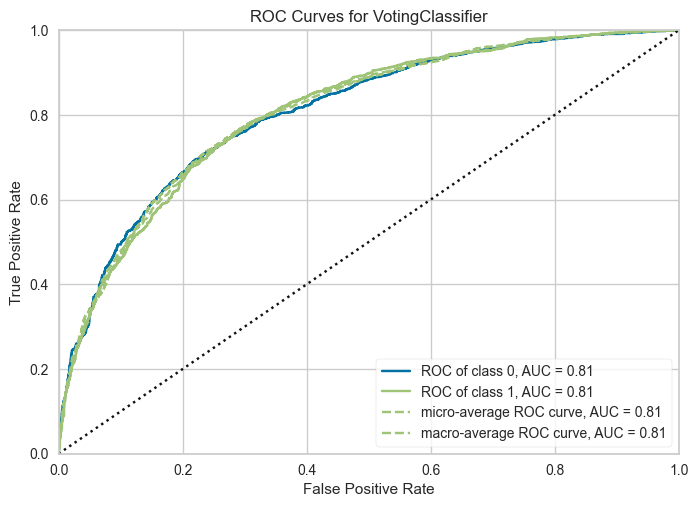

In [55]:
plot_model(blended)

In [56]:
# blended = blend_models(estimator_list = best_1, fold = 5, method = 'soft')

In [57]:
pred_holdout = predict_model(blended)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.7361,0.8076,0.8082,0.7325,0.7685,0.4633,0.4663


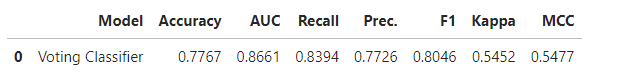

In [58]:
final_model = finalize_model(blended)

In [59]:
predictions = predict_model(final_model, data = test)

In [60]:
predictions['Score']

0        0.6698
1        0.7929
2        0.8225
3        0.6041
4        0.7142
          ...  
35447    0.7432
35448    0.7899
35449    0.9178
35450    0.5558
35451    0.7517
Name: Score, Length: 35452, dtype: float64

In [61]:
predictions['Label']

0        1
1        1
2        1
3        1
4        1
        ..
35447    1
35448    1
35449    1
35450    1
35451    1
Name: Label, Length: 35452, dtype: int32

In [62]:
predictions.loc[predictions['Label'] == 0, 'Score'] = 1 - predictions.loc[predictions['Label'] == 0, 'Score']

In [63]:
predictions['Score']

0        0.6698
1        0.7929
2        0.8225
3        0.6041
4        0.7142
          ...  
35447    0.7432
35448    0.7899
35449    0.9178
35450    0.5558
35451    0.7517
Name: Score, Length: 35452, dtype: float64

In [64]:
sub = predictions['Score']

In [65]:
sub

0        0.6698
1        0.7929
2        0.8225
3        0.6041
4        0.7142
          ...  
35447    0.7432
35448    0.7899
35449    0.9178
35450    0.5558
35451    0.7517
Name: Score, Length: 35452, dtype: float64

In [66]:
submission = pd.read_csv('./data/sample_submission.csv')

submission['nerdiness'] = sub

In [67]:
submission

,index,nerdiness
0,0,0.6698
1,1,0.7929
2,2,0.8225
3,3,0.6041
4,4,0.7142
...,...,...
35447,35447,0.7432
35448,35448,0.7899
35449,35449,0.9178
35450,35450,0.5558


In [68]:
submission.to_csv("./submit/submit6.csv", index = False)